
# Week 04 – Image Processing Assignment

## Topics Covered
- Power Law Transformation (Gamma Correction)
- Image Negative
- Gamma Curves Analysis
- Intensity Range Mapping
- Practical Image Enhancement Techniques

**Student Name:** Atahodjayeva Kamila 
**Student ID:** 230107 
**Course:** ___________________________  
**Instructor:** ___________________________  
**Date:** 24 February 2026

---

## Submission Rules
- All solutions must be implemented in code.
- Output images must be clearly displayed.
- Code must be clean and well-structured.
- No theoretical explanation sections required.

---



# Part 1 – Power Law Transformation (Gamma Correction)

### Challenge 1.1
Implement a function `gamma_correction(image, gamma)` from scratch.

Requirements:
- Normalize image to [0,1]
- Apply power-law transformation
- Convert back to uint8
- Display original and corrected image side by side

---


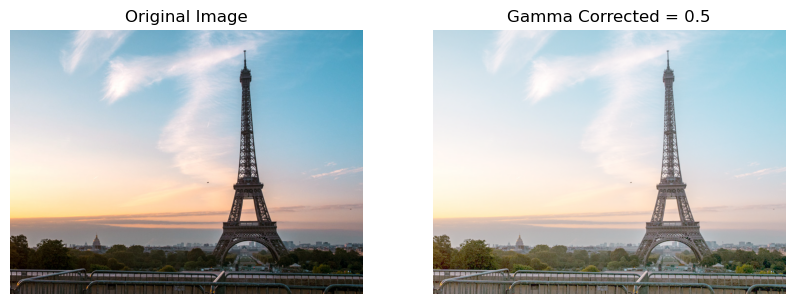

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(image, gamma, c=1.0):
    normalized = image.astype(np.float32) / 255.0
    corrected = c * np.power(normalized, gamma)
    corrected = np.clip(corrected,0,1)
    corrected = (corrected * 255).astype(np.uint8)
    return corrected

image = cv2.imread('/Users/User/Downloads/eifel.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gamma = 0.5
corrected_image = gamma_correction(image_rgb, gamma)
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(corrected_image)
plt.title(f"Gamma Corrected = {gamma}")
plt.axis("off")

plt.show()


### Challenge 1.2 – Gamma Curve Analysis

1. Generate intensity values r in range [0,1].
2. Plot gamma curves for at least 5 different gamma values.
3. Ensure all curves appear in one plot.

---


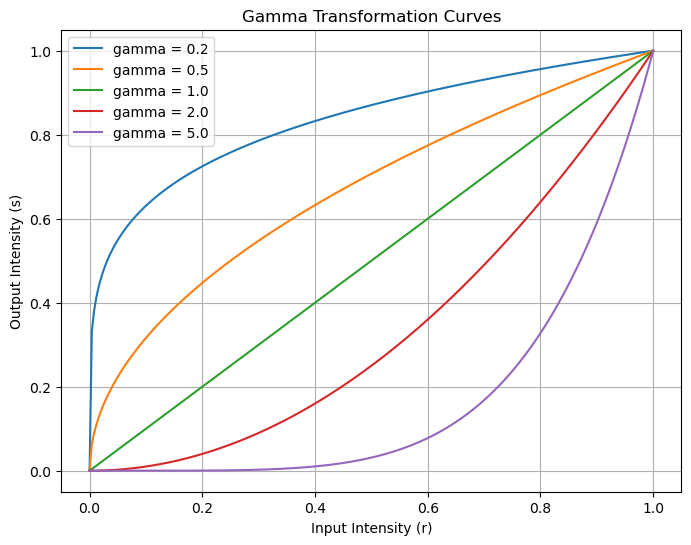

In [3]:
r = np.linspace(0, 1, 256)

gamma_values = [0.2, 0.5, 1.0, 2.0, 5.0]

plt.figure(figsize=(8,6))
for gamma in gamma_values:
    s = r ** gamma
    plt.plot(r, s, label=f'gamma = {gamma}')

plt.title("Gamma Transformation Curves")
plt.xlabel("Input Intensity (r)")
plt.ylabel("Output Intensity (s)")
plt.legend()
plt.grid(True)

plt.show()




### Challenge 1.3 – Comparative Study

Apply gamma values:
- 0.5
- 1.0
- 2.0

Display results in a structured layout.
Add titles clearly indicating gamma value.

---


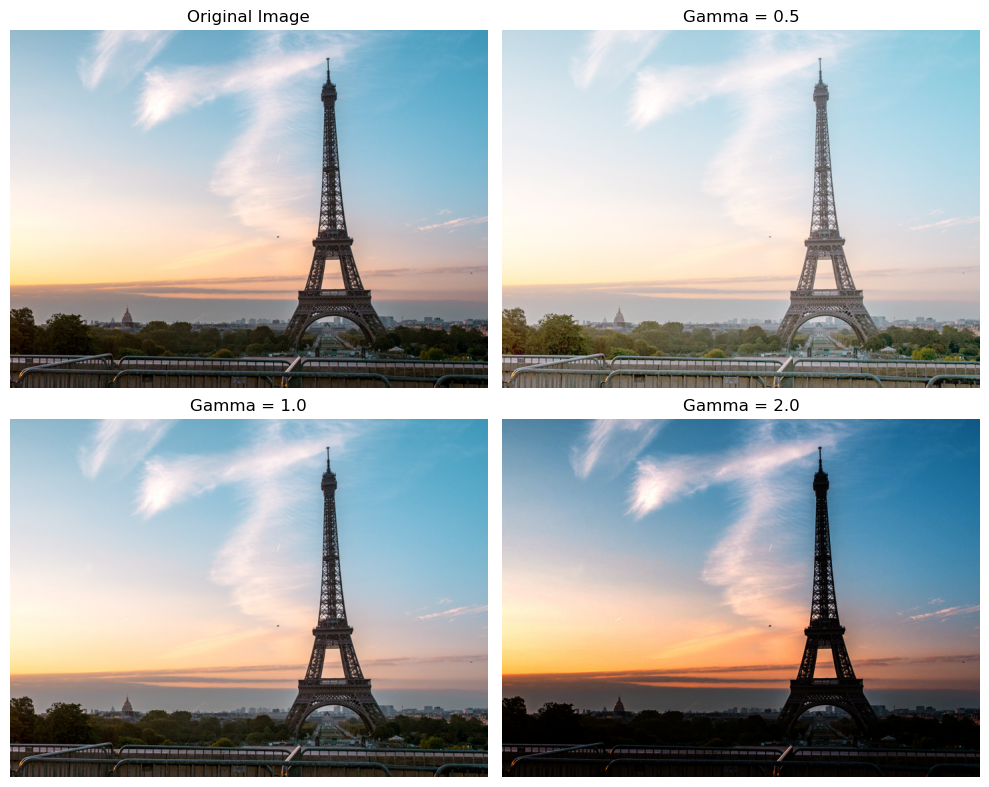

In [4]:
if image is None:
    print("Error: Image not found.")
else:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    gamma_05 = gamma_correction(image_rgb, 0.5)
    gamma_10 = gamma_correction(image_rgb, 1.0)
    gamma_20 = gamma_correction(image_rgb, 2.0)
    
    plt.figure(figsize=(10,8))
    plt.subplot(2,2,1)
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(2,2,2)
    plt.imshow(gamma_05)
    plt.title("Gamma = 0.5")
    plt.axis("off")

    plt.subplot(2,2,3)
    plt.imshow(gamma_10)
    plt.title("Gamma = 1.0")
    plt.axis("off")

    plt.subplot(2,2,4)
    plt.imshow(gamma_20)
    plt.title("Gamma = 2.0")
    plt.axis("off")

    plt.tight_layout()
    plt.show()


# Part 2 – Basic Intensity Transformations

### Challenge 2.1 – Image Negative

Create an image negative function without using built-in shortcuts.

Formula must be implemented manually.

---


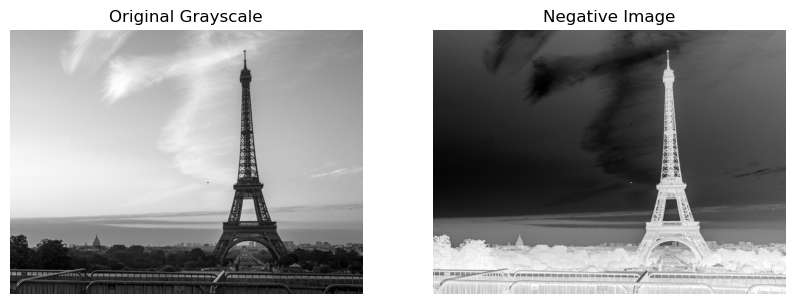

In [5]:
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

negative = np.zeros_like(gray)
rows, cols = gray.shape

for i in range(rows):
    for j in range(cols):
        negative[i, j] = 255 - gray[i, j]

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(negative, cmap='gray')
plt.title("Negative Image")
plt.axis("off")

plt.show()




### Challenge 2.2 – Intensity Range Mapping

Set pixel intensity range [A, B] to white (255).

Requirements:
- Accept A and B as parameters.
- Leave other pixels unchanged.
- Display before and after.

---


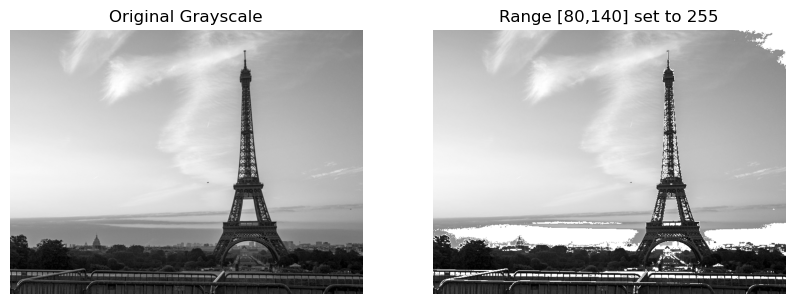

True

In [6]:
A = 80
B = 140
range_img = gray.copy()

mask = (range_img >= A) & (range_img <= B)
range_img[mask] = 255

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(range_img, cmap='gray')
plt.title(f"Range [{A},{B}] set to 255")
plt.axis("off")

plt.show()

cv2.imwrite("range_output.jpg", range_img)




### Challenge 2.3 – Integrated Enhancement

Create a pipeline that:
1. Reads image
2. Applies gamma correction
3. Applies intensity mapping
4. Displays final enhanced image

---


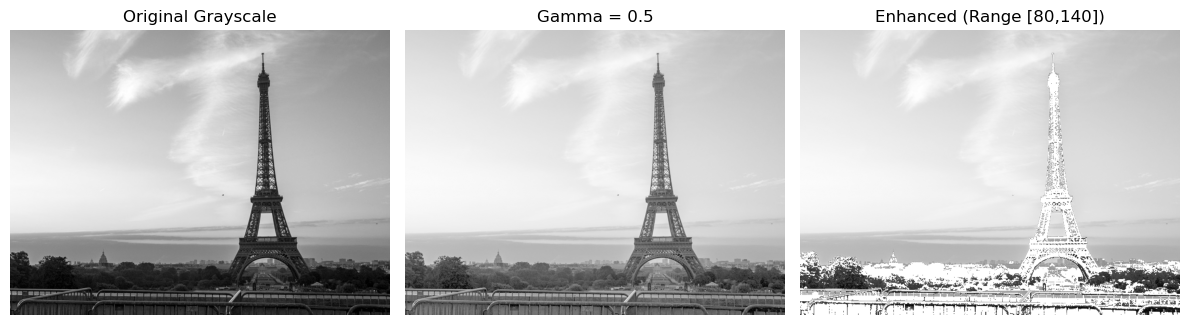

True

In [7]:
def intensity_range_mapping(image, A, B):
    result = image.copy()
    mask = (result >= A) & (result <= B)
    result[mask] = 255
    return result
    
gamma = 0.5
gamma_img = gamma_correction(gray, gamma)
A = 80
B = 140
enhanced_img = intensity_range_mapping(gamma_img, A, B)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Grayscale")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(gamma_img, cmap='gray')
plt.title(f"Gamma = {gamma}")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(enhanced_img, cmap='gray')
plt.title(f"Enhanced (Range [{A},{B}])")
plt.axis("off")

plt.tight_layout()
plt.show()
cv2.imwrite("enhanced_image.jpg", enhanced_img)


# Part 3 – Advanced Optimization Challenge

### Challenge 3.1 – Performance & Robustness

Improve your functions by:

- Adding input validation
- Handling grayscale and RGB images
- Avoiding redundant computations
- Structuring reusable functions

---

### Final Task

Create one clean final script that performs:
- Gamma analysis
- Negative transformation
- Intensity mapping
- Final comparison visualization

---


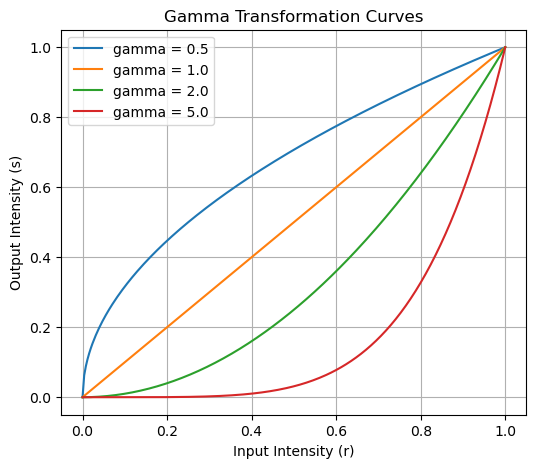

TypeError: 'numpy.ndarray' object is not callable

In [16]:
def plot_gamma_curves():
    r = np.linspace(0, 1, 256)
    gamma_values = [0.5, 1.0, 2.0, 5.0]

    plt.figure(figsize=(6,5))

    for gamma in gamma_values:
        s = r ** gamma
        plt.plot(r, s, label=f'gamma = {gamma}')

    plt.title("Gamma Transformation Curves")
    plt.xlabel("Input Intensity (r)")
    plt.ylabel("Output Intensity (s)")
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_gamma_curves()

if image is None:
    print("Error: image not found.")
else:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gamma_value = 0.5
    gamma_img = gamma_correction(gray, gamma_value)
    
    negative_img = image_negative(gray)
    A = 80
    B = 140
    range_img = intensity_range_mapping(gray, A, B)
    plt.figure(figsize=(12,8))

    plt.subplot(2,2,1)
    plt.imshow(gray, cmap='gray')
    plt.title("Original")
    plt.axis("off")

    plt.subplot(2,2,2)
    plt.imshow(gamma_img, cmap='gray')
    plt.title(f"Gamma = {gamma_value}")
    plt.axis("off")

    plt.subplot(2,2,3)
    plt.imshow(negative_img, cmap='gray')
    plt.title("Negative")
    plt.axis("off")

    plt.subplot(2,2,4)
    plt.imshow(range_img, cmap='gray')
    plt.title(f"Range [{A},{B}] -> 255")
    plt.axis("off")

    plt.tight_layout()
    plt.show()
    cv2.imwrite("final_gamma.jpg", gamma_img)
    cv2.imwrite("final_negative.jpg", negative_img)
    cv2.imwrite("final_range.jpg", range_img)